In [18]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [19]:
IC = xr.open_dataset('MOM_IC.nc')


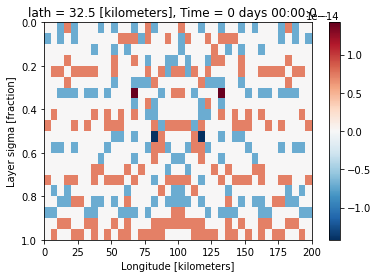

In [20]:
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
(IC.Salt-ideal_salt).isel(lath = 0).plot(yincrease = False)
plt.show()


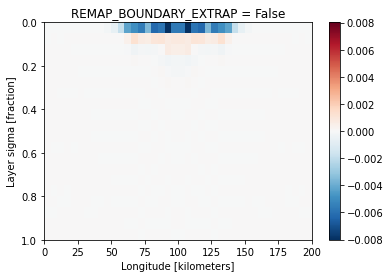

In [3]:
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
(IC.Salt-ideal_salt).isel(lath = 0).plot(yincrease = False)
plt.title('REMAP_BOUNDARY_EXTRAP = False')
plt.show()


In [2]:
base = 'sigma-remapextrap'
def open_IC(label):
    IC = xr.open_dataset(base + '/MOM_IC'+label+'.nc')
    return IC


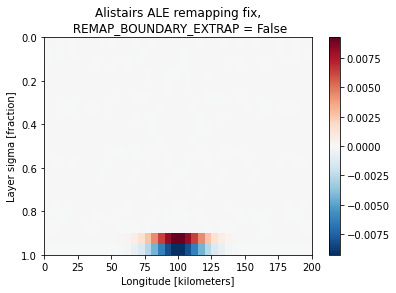

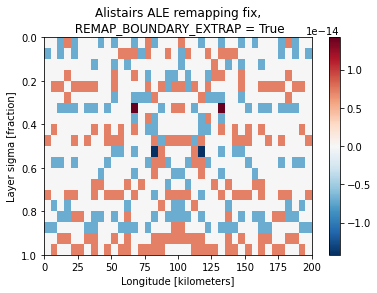

In [3]:
label = ''
IC = open_IC(label)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
(IC.Salt-ideal_salt).isel(lath = 0).plot(yincrease = False)
plt.title('Alistairs ALE remapping fix,\n REMAP_BOUNDARY_EXTRAP = False')
plt.show()

label = '-remapbdryextrap'
IC = open_IC(label)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
(IC.Salt-ideal_salt).isel(lath = 0).plot(yincrease = False)
plt.title('Alistairs ALE remapping fix,\n REMAP_BOUNDARY_EXTRAP = True')
plt.show()

Text(0.5, 0.98, 'Salinity anomaly from linearity with depth, sigma coordinate icemount')

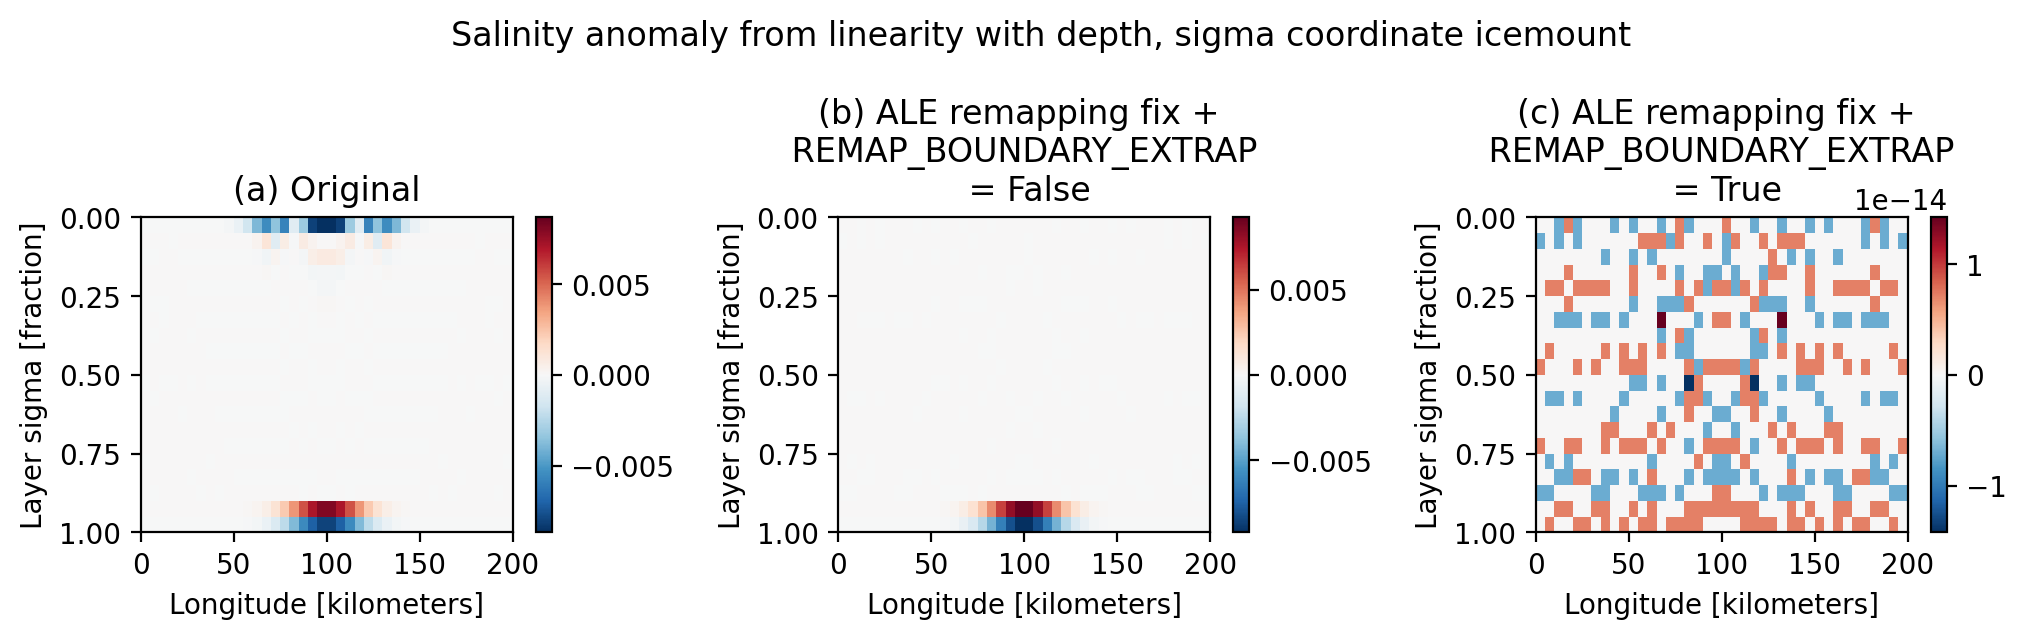

In [17]:
fig, axes = plt.subplots(ncols = 3, figsize = (12,3),dpi = 200)

IC = xr.open_dataset('archive/MOM_IC-sigma-isomip.nc')
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
(IC.Salt-ideal_salt).isel(lath = 0).plot(ax = axes[0],yincrease = False)
axes[0].set_title('(a) Original')

label = ''
IC = open_IC(label)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
(IC.Salt-ideal_salt).isel(lath = 0).plot(ax = axes[1],yincrease = False)
axes[1].set_title('(b) ALE remapping fix + \n REMAP_BOUNDARY_EXTRAP \n = False')

label = '-remapbdryextrap'
IC = open_IC(label)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
(IC.Salt-ideal_salt).isel(lath = 0).plot(ax = axes[2],yincrease = False)
axes[2].set_title('(c) ALE remapping fix + \n REMAP_BOUNDARY_EXTRAP \n = True')

fig.subplots_adjust(wspace = 0.5,top = 0.65)
fig.suptitle('Salinity anomaly from linearity with depth, sigma coordinate icemount')